# This is both in class-practice Lecture 12 and HW#4 which is due at 6:30PM on March 16th 2016!

In [5]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib notebook

In [6]:
file = "/Users/karla/SF-dat/SF-DAT-20/Data/spambase.csv"
SpamData = pd.read_csv(file)
SpamData.head()
print len(SpamData)
SpamData.head()

4601


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0,0.135,0.000,0.000,3.537,40,191,1


In [7]:
ListOfAllVariables = SpamData.columns.values
print ListOfAllVariables
X = SpamData[ListOfAllVariables]
del X['is_spam']
y = SpamData['is_spam']

['word_freq_make' 'word_freq_address' 'word_freq_all' 'word_freq_3d'
 'word_freq_our' 'word_freq_over' 'word_freq_remove' 'word_freq_internet'
 'word_freq_order' 'word_freq_mail' 'word_freq_receive' 'word_freq_will'
 'word_freq_people' 'word_freq_report' 'word_freq_addresses'
 'word_freq_free' 'word_freq_business' 'word_freq_email' 'word_freq_you'
 'word_freq_credit' 'word_freq_your' 'word_freq_font' 'word_freq_000'
 'word_freq_money' 'word_freq_hp' 'word_freq_hpl' 'word_freq_george'
 'word_freq_650' 'word_freq_lab' 'word_freq_labs' 'word_freq_telnet'
 'word_freq_857' 'word_freq_data' 'word_freq_415' 'word_freq_85'
 'word_freq_technology' 'word_freq_1999' 'word_freq_parts' 'word_freq_pm'
 'word_freq_direct' 'word_freq_cs' 'word_freq_meeting' 'word_freq_original'
 'word_freq_project' 'word_freq_re' 'word_freq_edu' 'word_freq_table'
 'word_freq_conference' 'char_freq_;' 'char_freq_(' 'char_freq_['
 'char_freq_!' 'char_freq_$' 'char_freq_#' 'capital_run_length_average'
 'capital_run_lengt

### Earlier in this course, we used logistic regression model and could achieve 8.2% misclassification error. Now, you know a little bit of higher end algorithms like Random Forest and boosting. Go ahead and beat Logistic regression algorithm. The champion, the person who beats CV-error of 8.2% and makes the least amount of error will receive a ONE DOLLAR bill award! 
### Just beat it, beat it, beat it, beat it
### No one wants to be defeated
### Showin' how funky strong is your fight 
### It doesn't matter who's wrong or right 

In order to be consitent use the following way to cross-validate your errors:
from sklearn import cross_validation

kf = cross_validation.KFold(len(BostonData), n_folds = 10, shuffle = True) 

scores = []

for train_index, test_index in kf:

                                  ...
                                  

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

RFClass = RandomForestClassifier(n_estimators = 1000, 
                                 max_features = 4, # You can set it to a number or 'sqrt', 'log2', etc
                                 min_samples_leaf = 5,
                                 oob_score = True)
RFClass.fit(X,y)
print(RFClass.oob_score_)
scores = cross_val_score(RFClass, X, y, cv=10)
print(scores.mean())


0.941317104977
0.934113679341


<IPython.core.display.Javascript object>


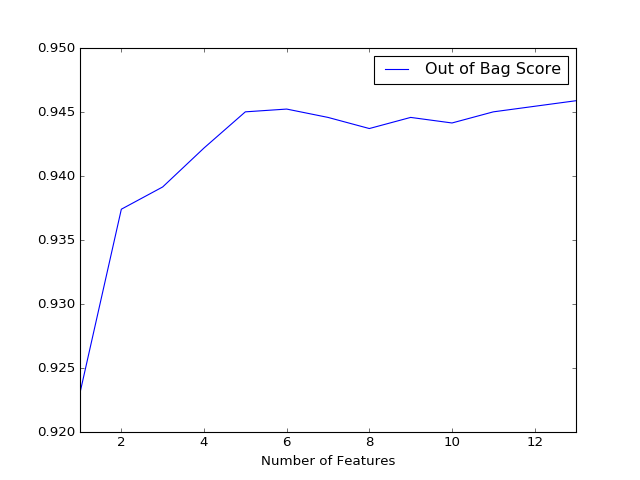

In [9]:
Features = range(1,14)
oob_score_RF = []
for i in Features:
        RFClass = RandomForestClassifier(n_estimators = 1000, #Number of trees - the more the better!
                           max_features = i,     #How many features to randomly choose in each node 
                           min_samples_leaf = 5, #Minimum number of observations at each terminal node
                           oob_score = True)
        RFClass.fit(X,y)  
        oob_score_RF.append(RFClass.oob_score_)

Depth_Choice_df = pd.DataFrame({'Out of Bag Score': oob_score_RF ,'Number of Features': Features})
Depth_Choice_df.plot(x ='Number of Features',y = 'Out of Bag Score' )


In [10]:
RFClass2 = RandomForestClassifier(n_estimators = 1000, #Number of trees - the more the better!
                           max_features = 10,     #How many features to randomly choose in each node 
                           min_samples_leaf = 5, #Minimum number of observations at each terminal node
                           oob_score = True)
RFClass2.fit(X,y)  
print RFClass2.oob_score_


0.943490545534


<IPython.core.display.Javascript object>


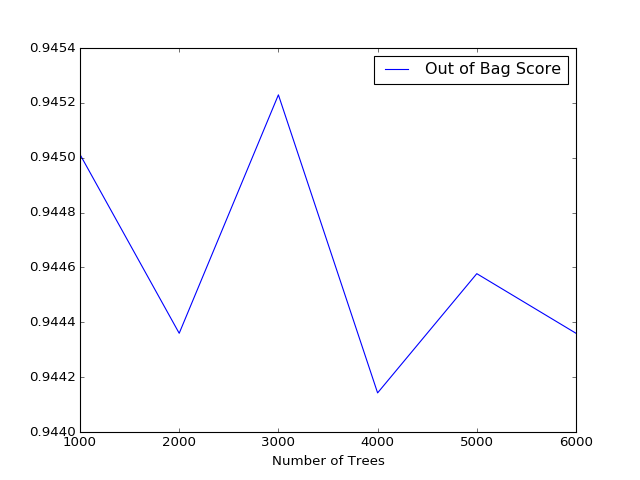

In [11]:
Trees = [1000,2000,3000,4000,5000,6000]
oob_score_RF = []
for i in Trees:
        RFClass = RandomForestClassifier(n_estimators = i, #Number of trees - the more the better!
                           max_features = 9,     #How many features to randomly choose in each node 
                           min_samples_leaf = 5, #Minimum number of observations at each terminal node
                           oob_score = True)
        RFClass.fit(X,y)  
        oob_score_RF.append(RFClass.oob_score_)

Depth_Choice_df = pd.DataFrame({'Out of Bag Score': oob_score_RF ,'Number of Trees': Trees})
Depth_Choice_df.plot(x ='Number of Trees',y = 'Out of Bag Score' )


In [12]:
print oob_score_RF

[0.94501195392306026, 0.94435992175613992, 0.94522929797870026, 0.94414257770049992, 0.94457726581178003, 0.94435992175613992]


In [13]:
from sklearn.ensemble import GradientBoostingClassifier
GBC_Tree = GradientBoostingClassifier(learning_rate = 0.1,
                                      n_estimators = 2000,
                                      max_depth = 2,
                                      min_samples_leaf = 5)


# Unfortunately we cannot use cross_val_score in this case. cross_val_score returns log of loss which is not a 
# measure we are interested in, in this course. 
print '1'
from sklearn import cross_validation
kf = cross_validation.KFold(len(SpamData), n_folds = 10, shuffle = True) #10 fold CV
scores = []
for train_index, test_index in kf:        
        GBC_Tree.fit(X.iloc[train_index], y.iloc[train_index])
        y_hat_test = GBC_Tree.predict(X.iloc[test_index]) 
        scores.append(float(sum(y_hat_test == y.iloc[test_index]))/len(y_hat_test))
print '2'
Score_GBC_CV = np.mean(scores)    
print '3'
print(Score_GBC_CV) 

1
2
3
0.955883712157


#I tried multiple combinations and this one above gave me the best result.  Here is what I tried: 
  
depth=2: 2000, .01 = .9493  
       : 2000, .01 = .9489  
       : 2000, .01 = .9482  
       : 2000, .1 = .9563  
       : 3000, .1 = .9554  
depth=3: 2000, .01 = .9484  
  
Final = .95588 with n_estimators=2000 and learning_rate=.1
